In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rc
from matplotlib import cm
rc('text', usetex=True)
rc('font', family='serif')
rc('xtick', labelsize=22)
rc('ytick', labelsize=22)

# Data Exploration Questions:

#### (1) How has Seattle's housing market been affected by the pandemic? 

#### (2) How does Seattle's housing market compare to other major US cities? 

#### (3) Do we see similar trends between the rental and buyers market?

# Part 1: Rental Market Trends

## Datasets

https://www.zillow.com/research/data/

In subsequent plots I look at the typical rental values for US cities as measured by the Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock.

In [30]:
rental = pd.read_csv('datasets/Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv')
dates = rental.keys()[3:]
dindex = np.arange(0,len(dates))
rental

RegionID                          RegionName  SizeRank  2014-01  2014-02  \
0      102001                       United States         0   1323.0   1328.0   
1      394913                        New York, NY         1   2264.0   2284.0   
2      753899  Los Angeles-Long Beach-Anaheim, CA         2   1708.0   1728.0   
3      394463                         Chicago, IL         3   1428.0   1439.0   
4      394514               Dallas-Fort Worth, TX         4   1140.0   1130.0   
..        ...                                 ...       ...      ...      ...   
101    394995                  Port St. Lucie, FL       119   1150.0   1177.0   
102    394602                    Fort Collins, CO       159   1173.0   1195.0   
103    394405                         Boulder, CO       162   1525.0   1509.0   
104    394645                         Greeley, CO       177   1210.0   1170.0   
105    394623                     Gainesville, GA       229    954.0    961.0   

     2014-03  2014-04  2014-05  2014-06  2014-07  ...  2020-06  2020-07  \
0     1335.0     1347   1367.0     1382     1393  ...     1701     1701   
1     2287.0     2318   2352.0     2374     2388  ...     2672     2643   
2     1737.0     1764   1798.0     1831     1854  ...     2419     2419   
3     1441.0     1458   1480.0     1495     1505  ...     1708     1702   
4     1141.0     1158   1178.0     1195     1203  ...     1494     1499   
..       ...      ...      ...      ...      ...  ...      ...      ...   
101   1163.0     1155   1198.0     1179     1191  ...     1686     1657   
102   1202.0     1245   1286.0     1303     1313  ...     1662     1654   
103   1509.0     1521   1566.0     1584     1612  ...     2010     2014   
104   1186.0     1142   1154.0     1192     1244  ...     1629     1630   
105    967.0      991    980.0      996      979  ...     1382     1317   

     2020-08  2020-09  2020-10  2020-11  2020-12  2021-01  2021-02  2021-03  
0       1693     1689     1684     1692     1691     1699     1705     1721  
1       2580     2531     2477     2452     2431     2449     2433     2469  
2       2414     2412     2413     2426     2420     2424     2423     2441  
3       1689     1670     1652     1645     1641     1638     1642     1661  
4       1498     1499     1501     1514     1519     1516     1523     1548  
..       ...      ...      ...      ...      ...      ...      ...      ...  
101     1682     1699     1748     1744     1768     1781     1803     1838  
102     1658     1635     1629     1641     1670     1652     1658     1690  
103     2012     2019     2021     2033     2050     2072     2095     2104  
104     1637     1659     1668     1656     1637     1656     1682     1720  
105     1362     1406     1433     1453     1458     1456     1465     1496  

[106 rows x 90 columns]

## Figure 1

In this figure I plotted the typical rental market value (measured by Zillow's ZORI index) for every US city as a function of time. The x-axis shows time, binned by month, spanning from Jan 2014 to Mar 2021. The y-axis shows the average ZORI value for that month. Highlighted in red is the past 12 months Mar 2020 to Mar 2021, to emphasize looking at the trends due to the pandemic. Because I wanted to emphasize Seattle's trend, but still wanted to see how it compared to other US cities, I plotted Seattle's curve in blue and the rest in gray. 

This figure was my first attempt to look at how the rental market for major US cities has varied over time. It allows you to see a few interesting trends, for example you can see that almost all US cities look like they have a positive slope, showing that the general cost of living everywhere is increasing. We also see that during the pandemic (the past year, which is highlighted in red), some cities look like they have increased in slope compared to before the pandemic, while other cities (like Seattle) have fallen in typical price since the pandemic. It seems to look like more expensive cities have had harder declines since the pandemic than cheaper cities, which is a trend worth further invesigating. We also seem to see some seasonal variation, where it looks like summer months have higher typical rental prices than winter months, and spring and fall are in between.

There are some notable limitations to this graph, for example besides Seattle you can't see which city is which, and adding labels to this format would be difficult without over-crowding the text. It is also difficult to tell how steep the overall slope is, and separate the overal cost of living slope from the seasonal trend. These limitations in this first plot, inspired some ideas for more figures, that I look at in subsequent plots.

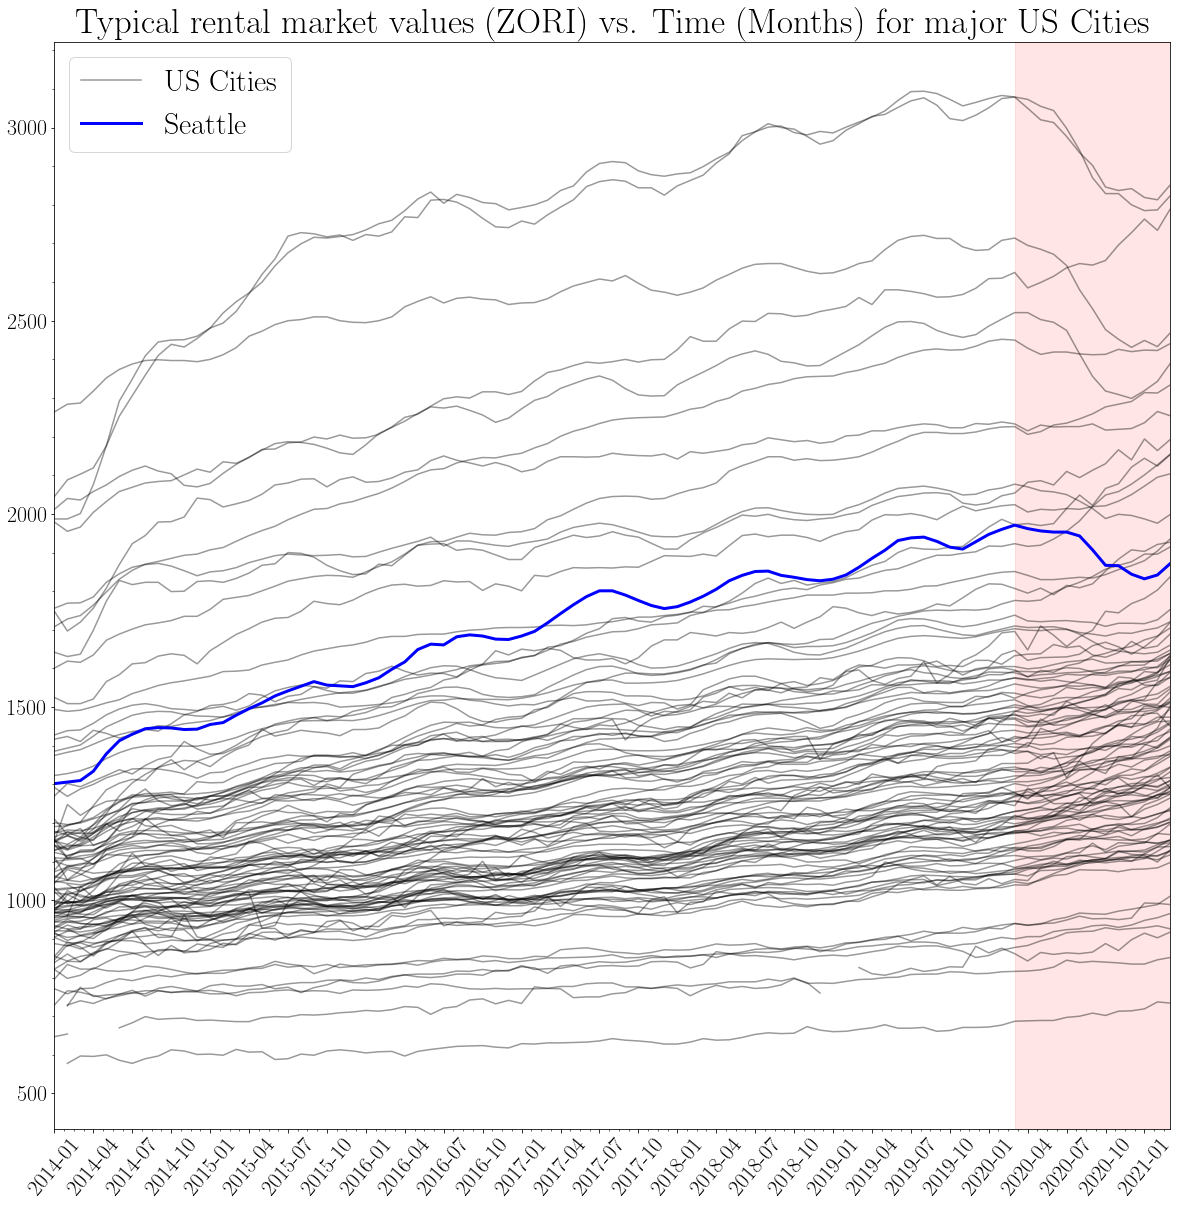

In [189]:
plt.figure(figsize=[20,20])

for reg in rental['RegionName']:
    city = rental[rental['RegionName'] == reg].T[3:].values.flatten()
    plt.plot(dindex, city, color='k', alpha=.4)
plt.plot(dindex[0], city[0], color='k', alpha=.4, label='US Cities')

seattle = rental[rental['RegionName'] == 'Seattle, WA'].T[3:].values.flatten()
plt.plot(dindex, seattle, color='b', linewidth=3, label='Seattle')
plt.axvspan(dindex[-13], dindex[-1], color='r', alpha=.1)

plt.xticks(dindex[::3], dates[::3], rotation=50)
plt.xlim(0, dindex[-1])
plt.title('Typical rental market values (ZORI) vs. Time (Months) for major US Cities', fontsize=35)
plt.legend(loc='upper left', fontsize=30)
plt.minorticks_on()
plt.show()

## Figure 2

In this figure, I plotted the derivative of typical rental value (measured by Zillow's ZORI index) as a function of time. Again, the past year of pandemic is highlighted in red, and Seattle is plotted in blue. Highlighted as a dashed puple line marks zero change over time, to show what a constant market would look like. 

In contrast to the previous plot, the derivative allows us to more distinctly see the seasonal trend of the typical rental value. The overall cost of living increase trend is shown by the fact that the curves are skewed above zero, but in this display, the overall trend does not distract as much from the seasonal trend. Interestingly, while almost all cities seem to vary sinusoidally (with highest prices in summer, lowest in winter), Seattle is more sharply affected by this trend than most US cities, as seen by the higher amplitude of fluctuation compared to the other gray curves.

We also see that while there was very consistent seasonal trends prior to Mar 2020, there is much higher scatter since the pandemic. Seattle's pandemic decline is clearly seen by the sharp negative spike around Oct 2020.

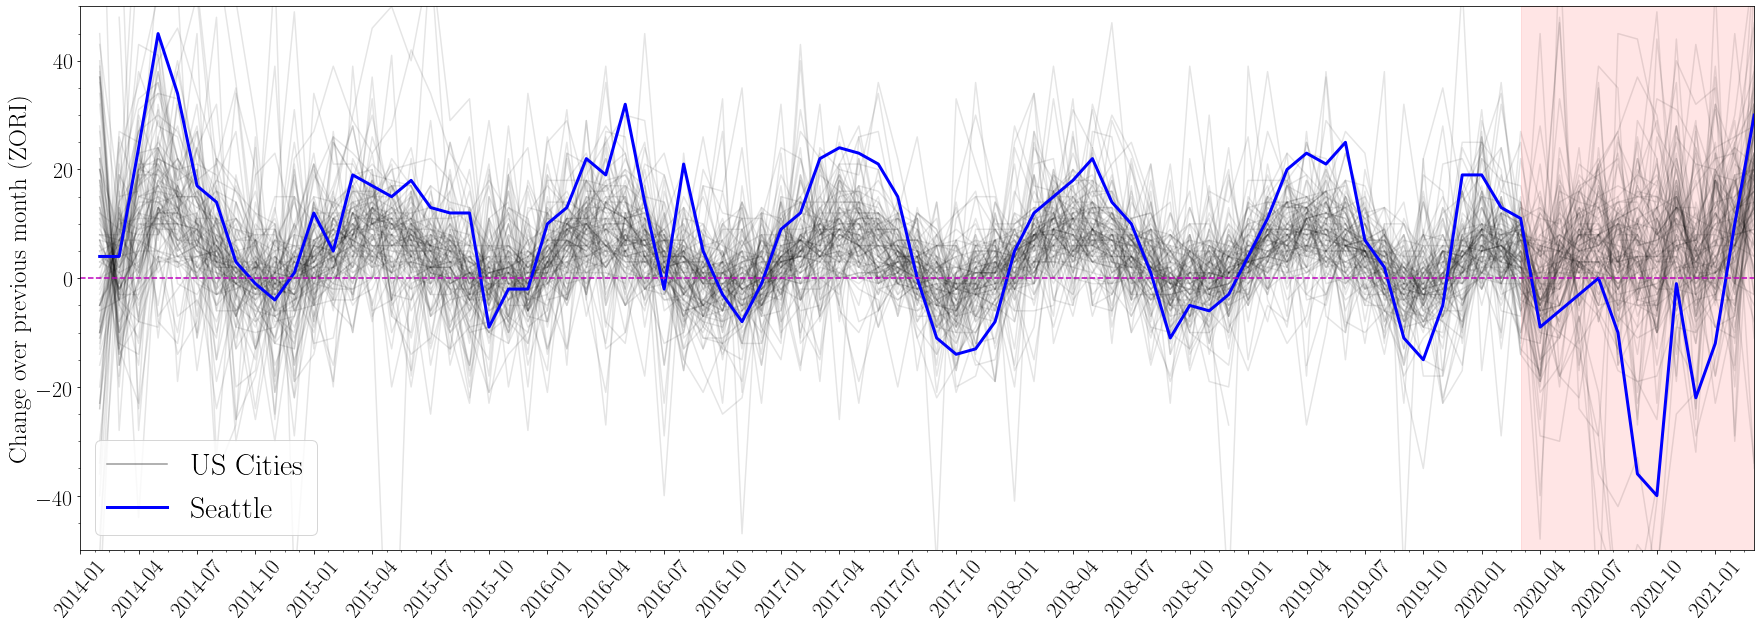

In [190]:
plt.figure(figsize=[30,10])

for reg in rental['RegionName']:
    city = rental[rental['RegionName'] == reg].T[3:].values.flatten()
    plt.plot(dindex[1:], np.diff(city), color='k', alpha=.1)
plt.plot(dindex[0], city[0], color='k', alpha=.4, label='US Cities')

plt.plot(dindex[1:], np.diff(seattle), color='b', linewidth=3, label='Seattle')
plt.axhline(0, color='m', linestyle='--')
plt.axvspan(dindex[-13], dindex[-1], color='r', alpha=.1)

plt.xticks(dindex[::3], dates[::3], rotation=50)
plt.xlim(0, dindex[-1])
plt.ylim(-50,50)
plt.ylabel(r'Change over previous month (ZORI)', fontsize=25)
plt.legend(loc='lower left', fontsize=30)
plt.minorticks_on()
plt.show()

## Figure 3

In this plot I looked at Seattle's typical rental prices, this time on a polar plot instead of cartesian. 

Pre-pandemic dates are plotted in blue, and you can see the consistent outward spiral as the overall cost of living has gone up. In contrast, the last pandemic year is plotted in red, which illustrates the downward (inward spiral trend).

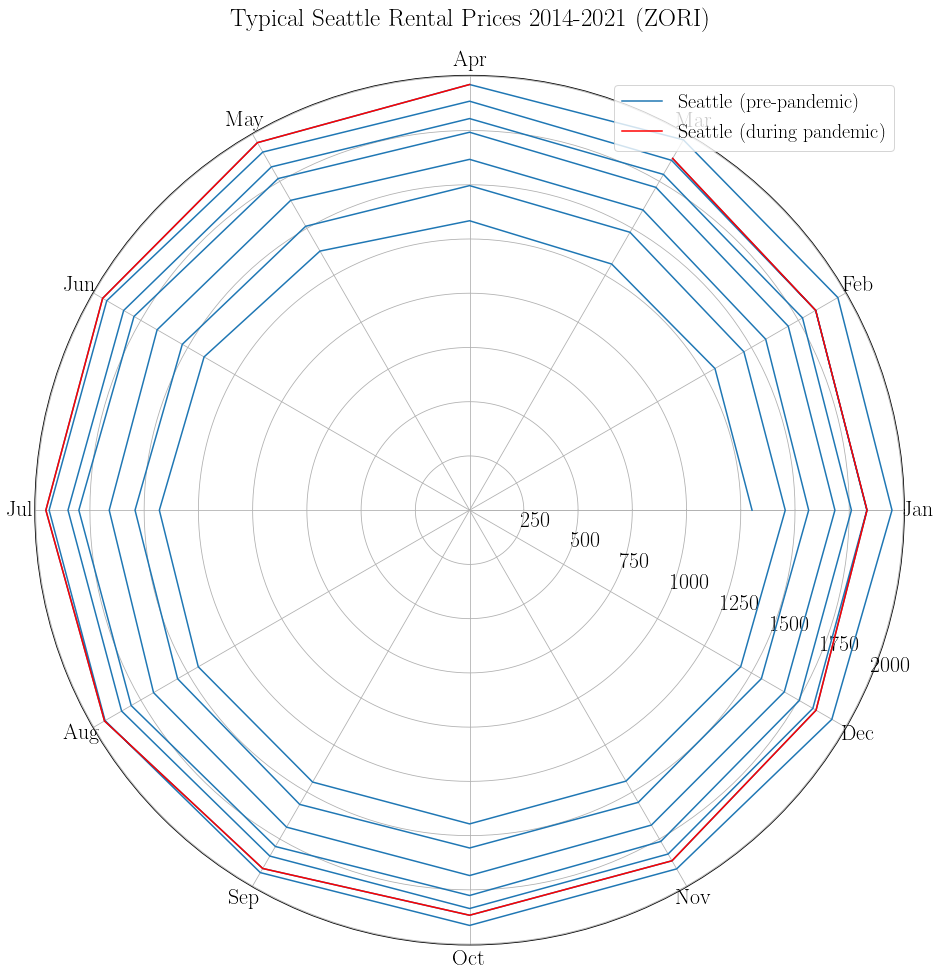

In [191]:
r = seattle
theta = [np.pi/6*r for r in range(len(seattle))]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=[16,16], subplot_kw={'projection': 'polar'})
ax.plot(theta, r, label='Seattle (pre-pandemic)')
ax.plot(theta[-12:], r[-12:], color='r', label='Seattle (during pandemic)')
ax.set_thetagrids(np.linspace(0,360,13), (months))
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
plt.legend(loc='upper right', fontsize=20)
ax.set_title("Typical Seattle Rental Prices 2014-2021 (ZORI)", fontsize=25)
plt.show()

## Figure 4

In this figure I wanted to just highlight the effect of the pandemic. To do that I looked at each month in the past year and calculated the percentage change from the same month exactly 1 year before it. Surprisingly (to me) it looks like most cities in the US have actually increased in price during the pandemic, while only a few (inculding Seattle) have dropped by a large (5-10%) percentage.

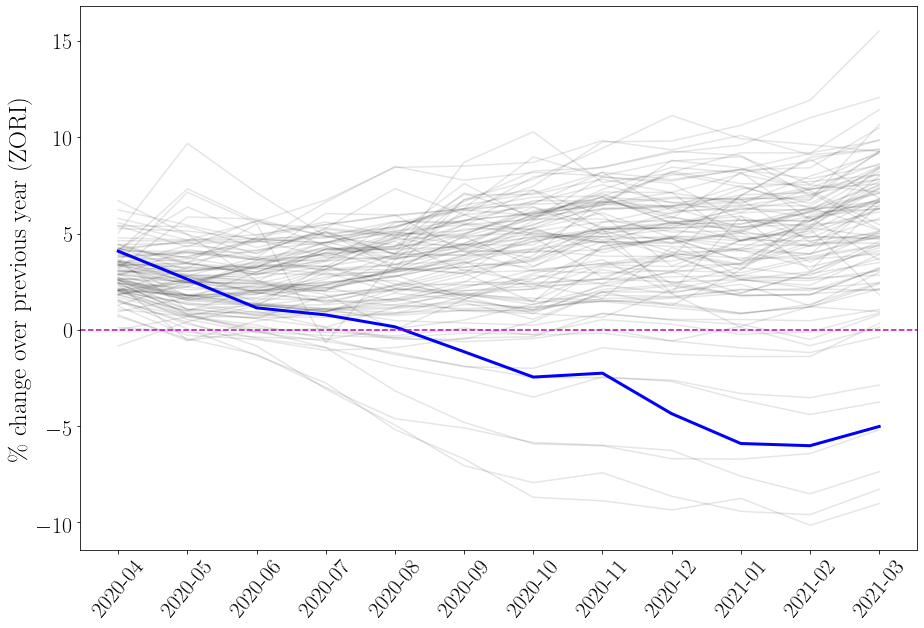

In [183]:
plt.figure(figsize=[15,10])

avg_perc_chg = []
latest_perc_chg = []
for reg in rental['RegionName']:
    city = rental[rental['RegionName'] == reg].T[3:].values.flatten()
    y20 = city[-12:] 
    y19 = city[-24:-12]
    perc_chg = (y20 - y19)/y19 * 100
    avg_perc_chg.append(np.mean(perc_chg))
    latest_perc_chg.append(perc_chg[-1])
    
    plt.plot(dindex[-12:], perc_chg, color='k', alpha=.1)
    

y20 = seattle[-12:] 
y19 = seattle[-24:-12]
plt.plot(dindex[-12:], (y20 - y19)/y19 * 100, color='b', linewidth=3)
plt.axhline(0, color='m', linestyle='--')

plt.xticks(dindex[-12:], dates[-12:], rotation=50)
plt.ylabel(r'\% change over previous year (ZORI)', fontsize=25)
plt.show()

## Figure 5 & 6

In this figure I wanted to emphasize labeling the individual cities, which I hadn't done in the previous plots. Similarly to the last plot I compared the percentage ZORI-value decrease compared to previous year. But this time just looking at the most current month (Mar 2021) to the rental market 1 year ago (Mar 2020, the start of the pandemic)

In my first iteration of this plot I had plotted the bars vertically, but found that I didn't like how you kind of have to tilt your head to read the labels. 

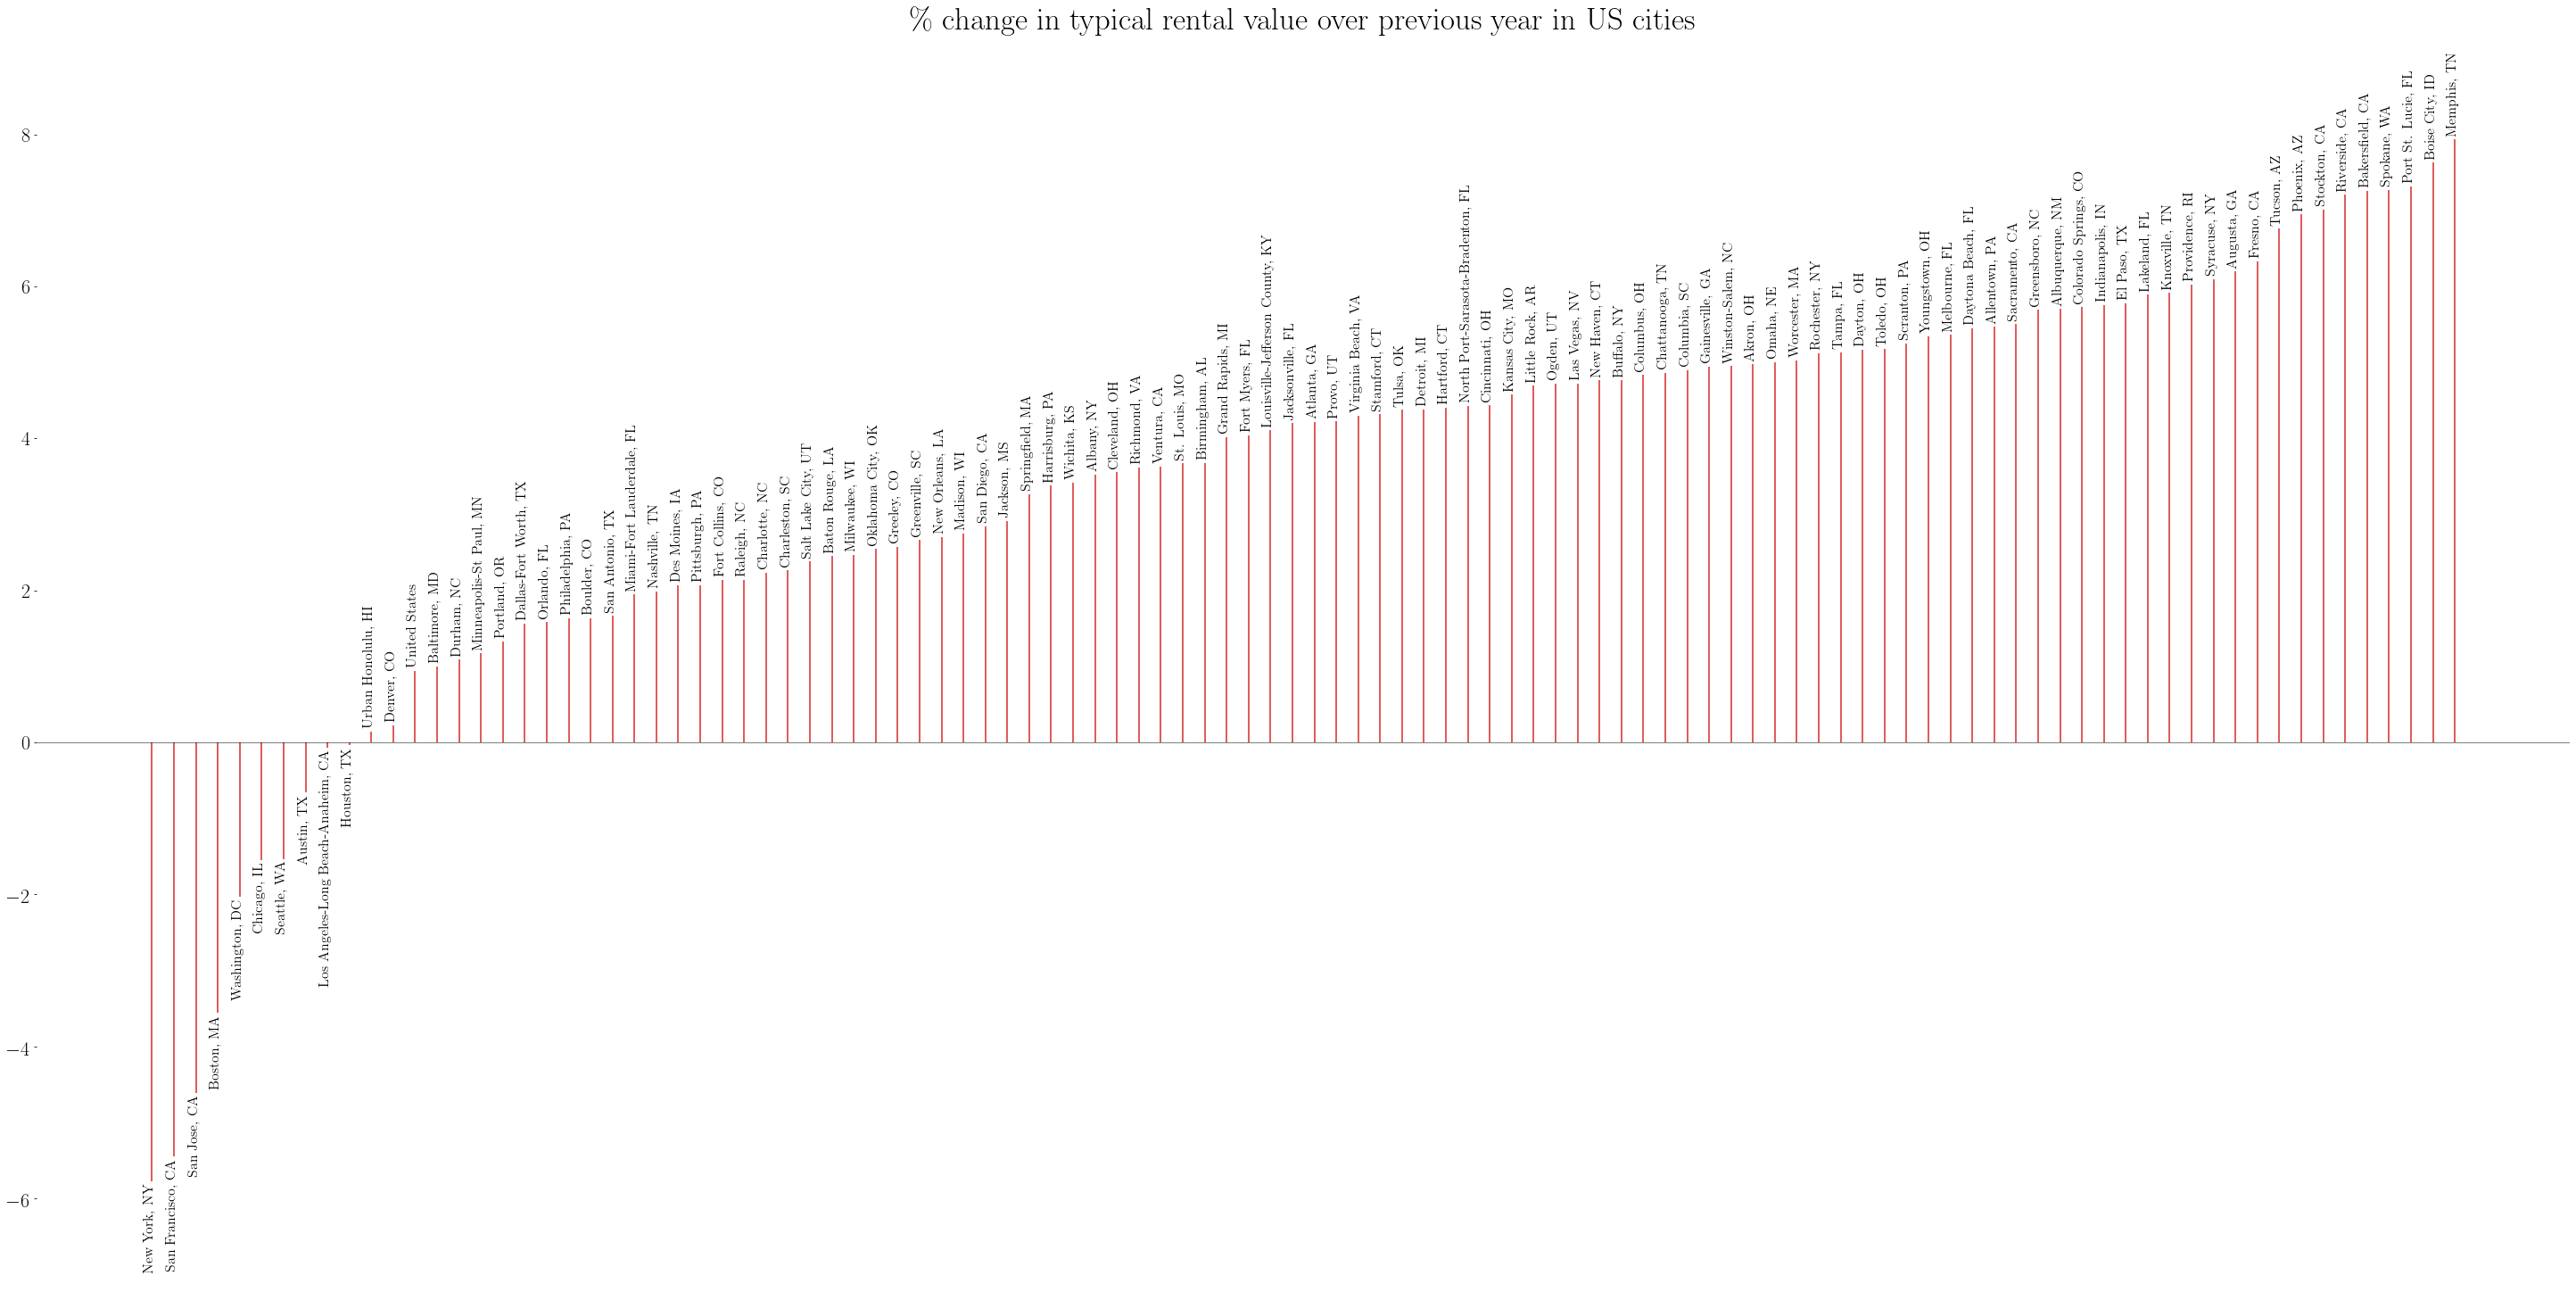

In [192]:
fig, ax = plt.subplots(figsize=[40,20], constrained_layout=True)
plt.title("\% change in typical rental value over previous year in US cities", fontsize=35)

spacing = np.arange(0,len(avg_perc_chg))
levels = np.array(avg_perc_chg)[np.argsort(avg_perc_chg)]
names = np.array(rental['RegionName'])[np.argsort(avg_perc_chg)]

ax.vlines(spacing, 0, levels, color="tab:red")  
ax.axhline(0, color='k', linewidth=.5)

for d, l, r in zip(spacing, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top", 
                rotation=90, fontsize=16)

ax.xaxis.set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim()

ax.margins(y=0.1)
plt.show()

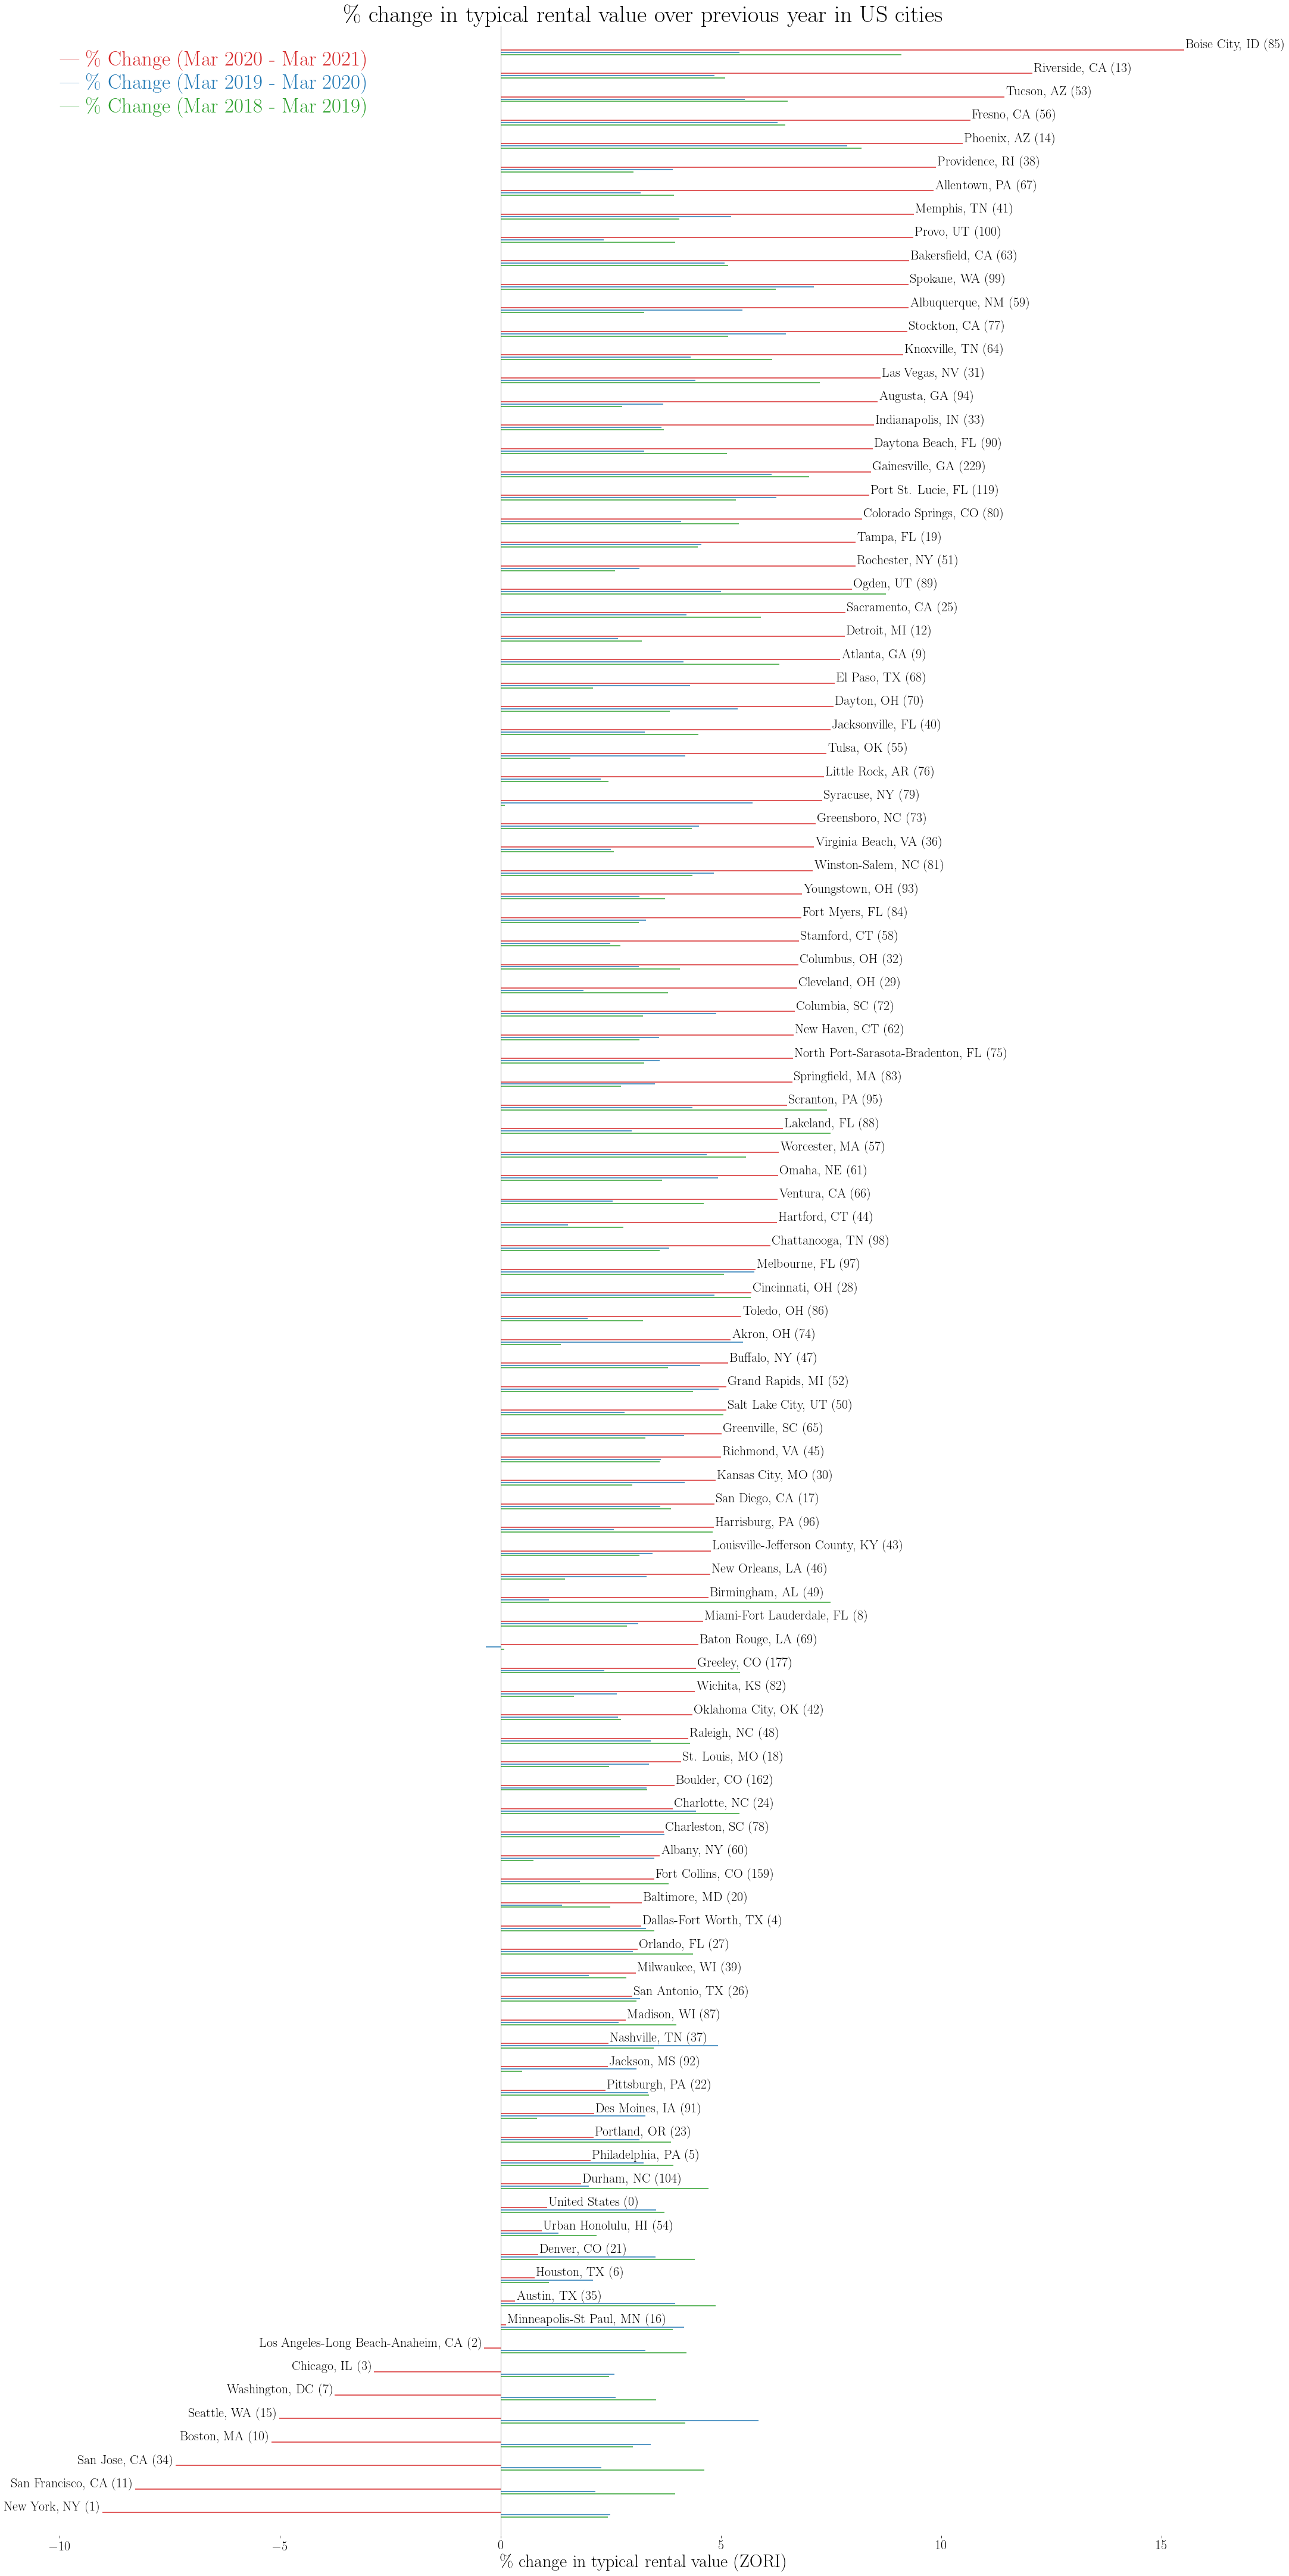

In [195]:
metric = latest_perc_chg
spacing = np.arange(0,len(rental))
levels = np.array(metric)[np.argsort(metric)]

reg = np.array(rental['RegionName'])[np.argsort(metric)]
sizes = np.array(rental['SizeRank'])[np.argsort(metric)]

names = ["{} ({})".format(a, b) for a, b in zip(reg, sizes)]

# =================

fig, ax = plt.subplots(figsize=[30,60], constrained_layout=True)
plt.title("\% change in typical rental value over previous year in US cities", fontsize=40)

# compare April 2021 to April 2020
ax.hlines(spacing, 0, levels, color="tab:red")  
ax.axvline(0, color='k', linewidth=.5)

for d, l, r in zip(spacing, levels, names):
    ax.annotate(r, xy=(l, d),
                xytext=(np.sign(l)*3, -3), textcoords="offset points",
                horizontalalignment="left" if l > 0 else "right",
                verticalalignment="bottom", 
                fontsize=22)
    
# compare April 2020 to April 2019 
prev_perc_chg = []
for reg in rental['RegionName']:
    city = rental[rental['RegionName'] == reg].T[3:].values.flatten()
    ynew = city[-13] 
    yold = city[-25]
    prev_perc_chg.append((ynew - yold)/yold * 100)
levels2 = np.array(prev_perc_chg)[np.argsort(metric)]
ax.hlines(spacing-.1, 0, levels2, color="tab:blue")

# compare April 2020 to April 2019 
prev_perc_chg = []
for reg in rental['RegionName']:
    city = rental[rental['RegionName'] == reg].T[3:].values.flatten()
    ynew = city[-25] 
    yold = city[-37]
    prev_perc_chg.append((ynew - yold)/yold * 100)
levels3 = np.array(prev_perc_chg)[np.argsort(metric)]
ax.hlines(spacing-.2, 0, levels3, color="tab:green")

ax.yaxis.set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylim(-1,spacing[-1]+1)
ax.set_xlabel('\% change in typical rental value (ZORI)', fontsize=30)

ax.text(-10, spacing[-1], r"--- \% Change (Mar 2020 - Mar 2021)", fontsize=35, color="tab:red", ha='left', va='top')
ax.text(-10, spacing[-1]-1, r"--- \% Change (Mar 2019 - Mar 2020)", fontsize=35, color="tab:blue", ha='left', va='top')
ax.text(-10, spacing[-1]-2, r"--- \% Change (Mar 2018 - Mar 2019)", fontsize=35, color="tab:green", ha='left', va='top')

ax.margins(y=0.1)
plt.show()

# Part 2: Buyer market trends

Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Zillow also publishes ZHVI for all single-family residences (USD, typical value for all single-family homes in a given region), for condo/coops (USD), for all homes with 1, 2, 3, 4 and 5+ bedrooms (USD), and the ZHVI per square foot (USD, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage).

In [8]:
bd1 = pd.read_csv('datasets/Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
bd2 = pd.read_csv('datasets/Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
bd3 = pd.read_csv('datasets/Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
bd4 = pd.read_csv('datasets/Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

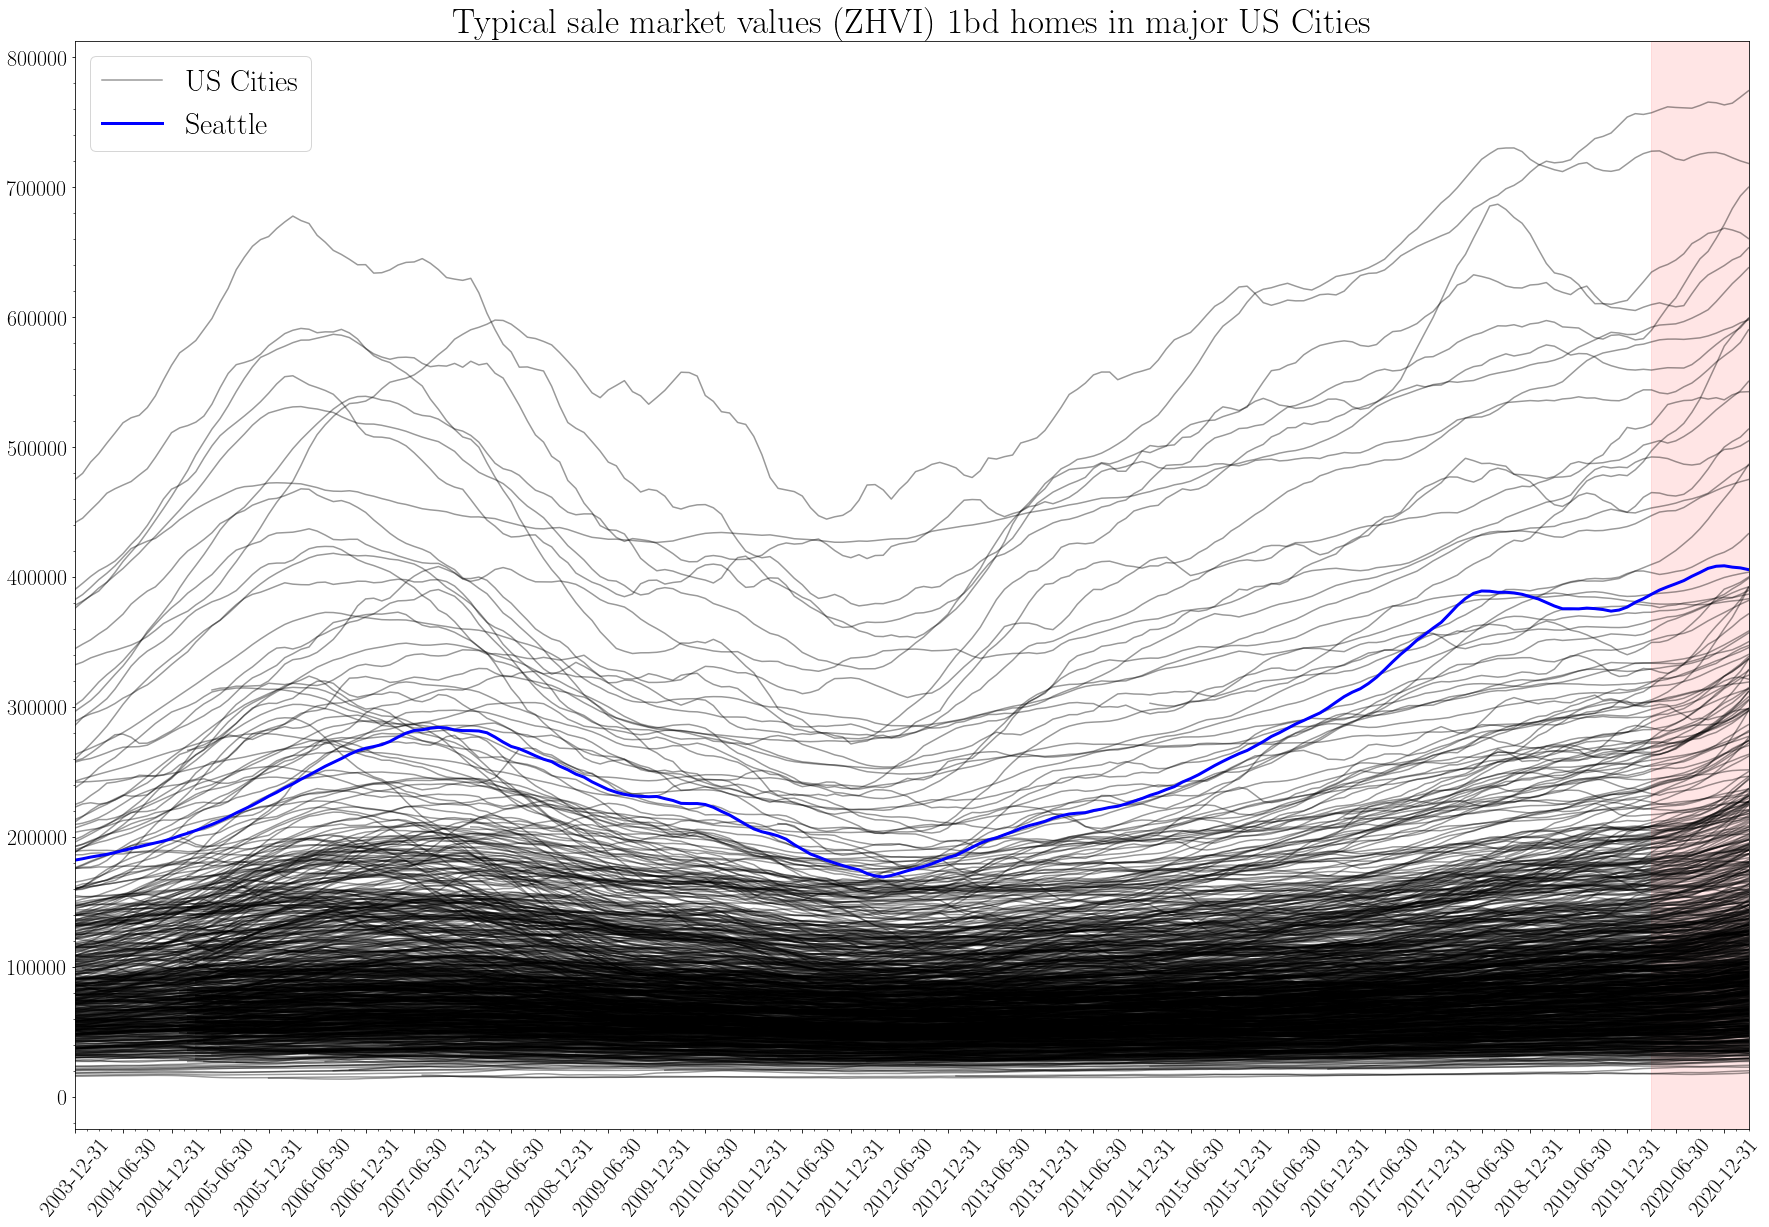

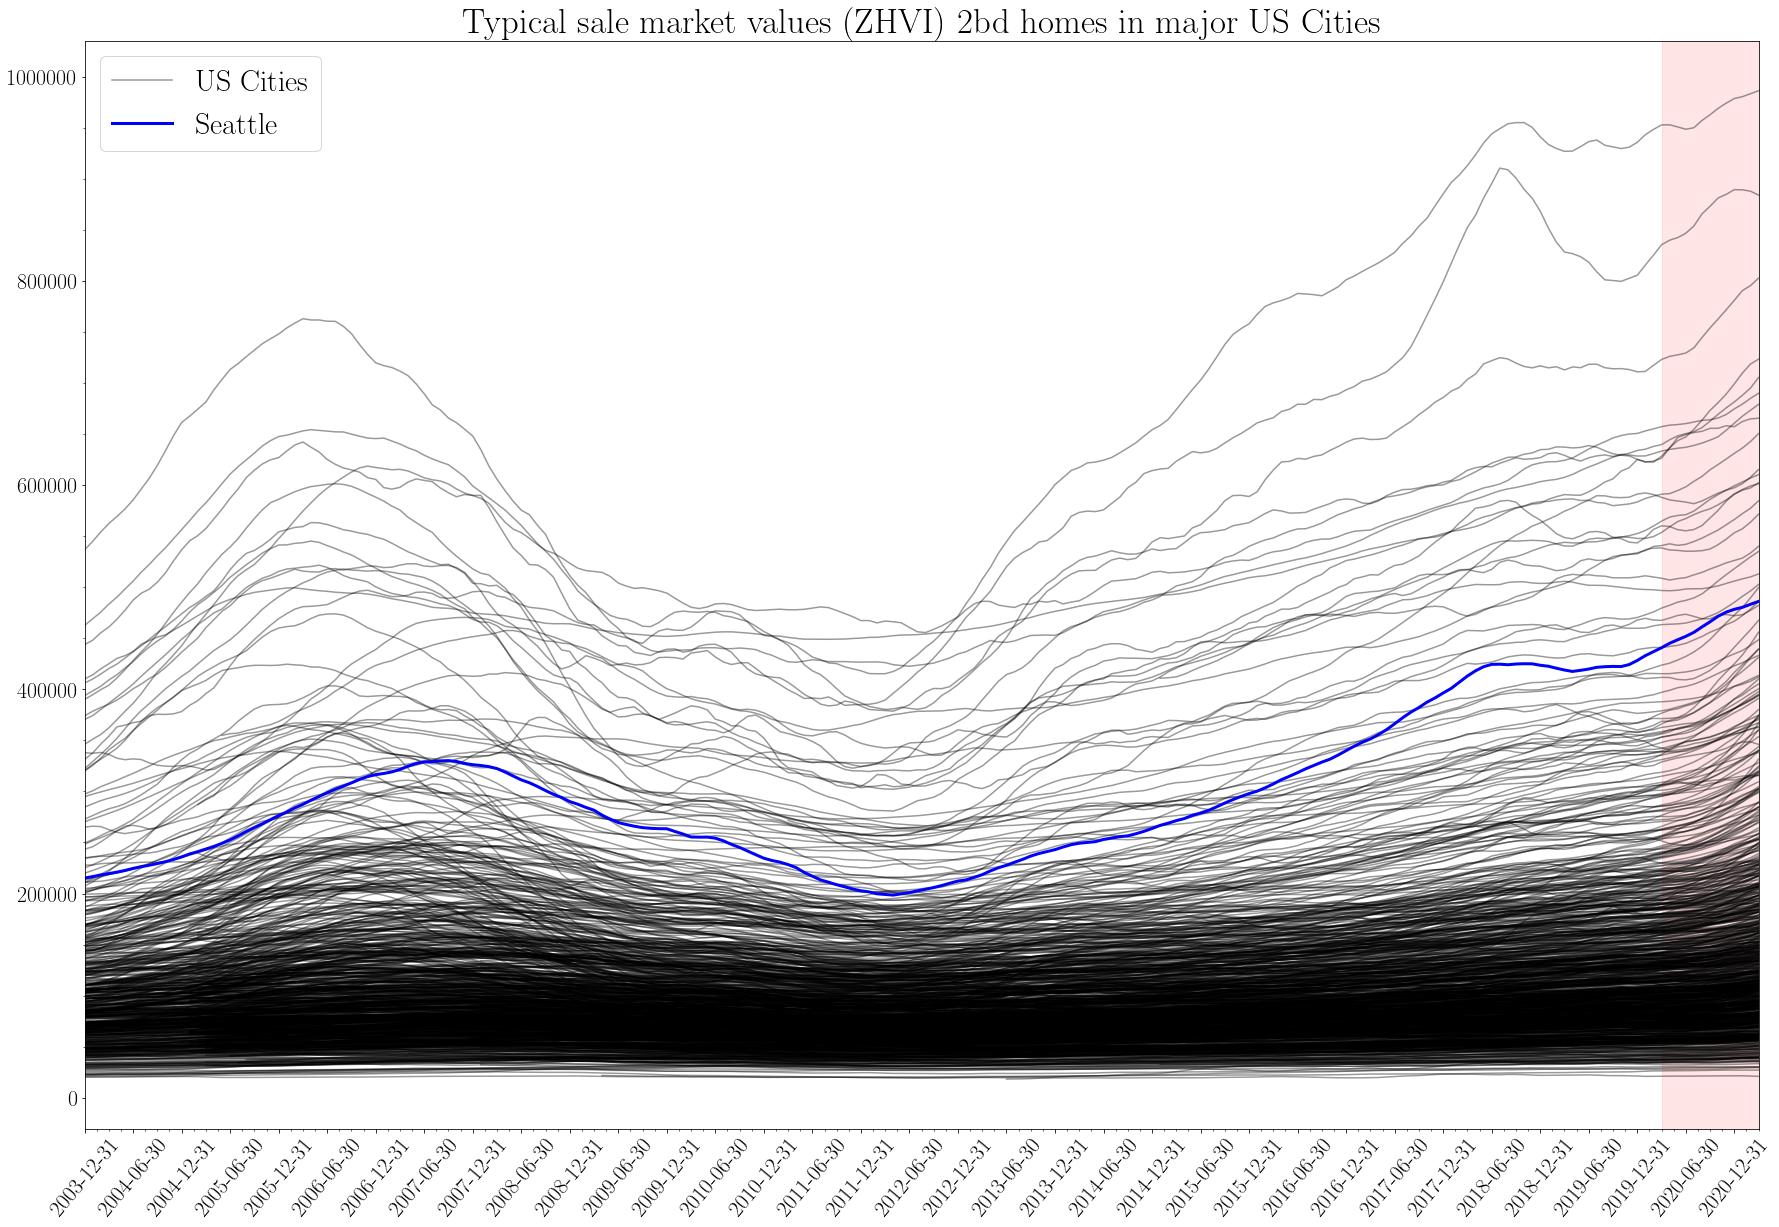

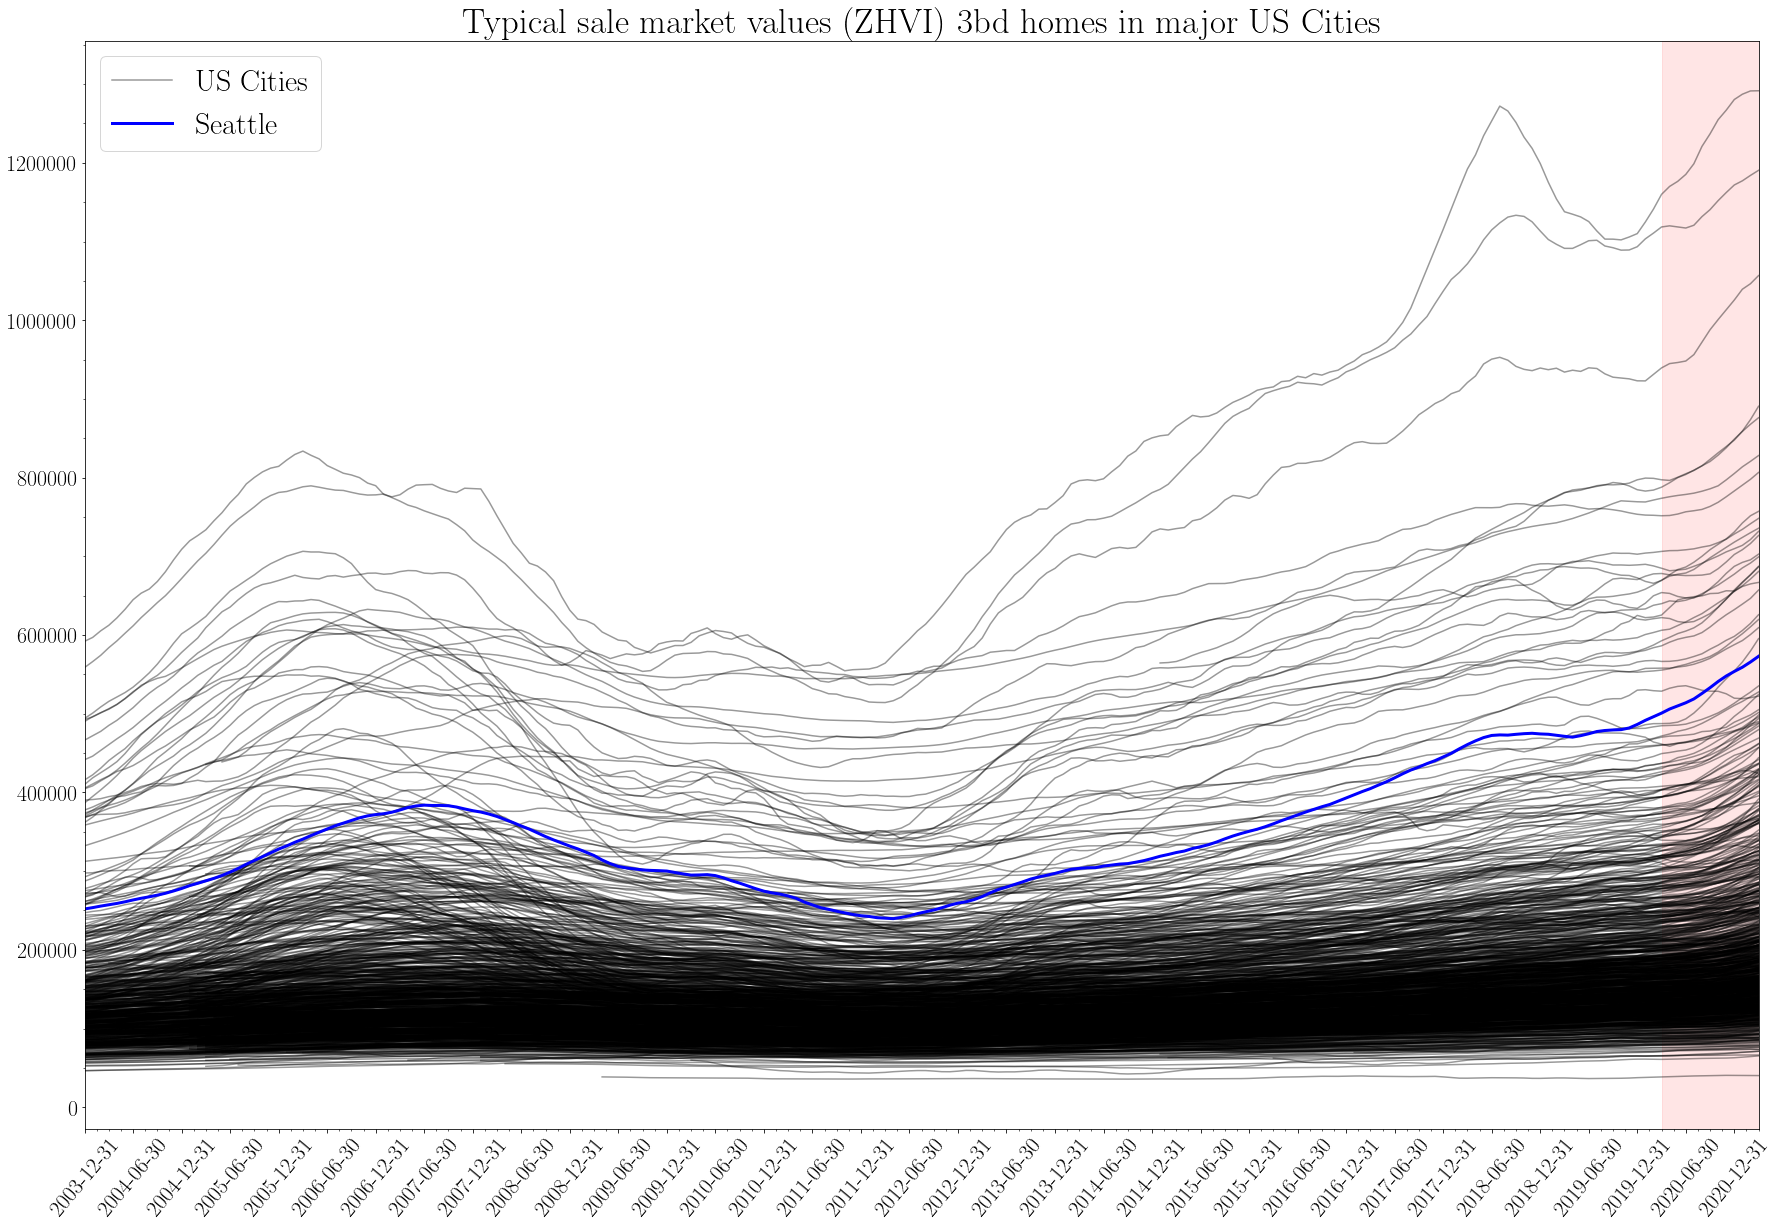

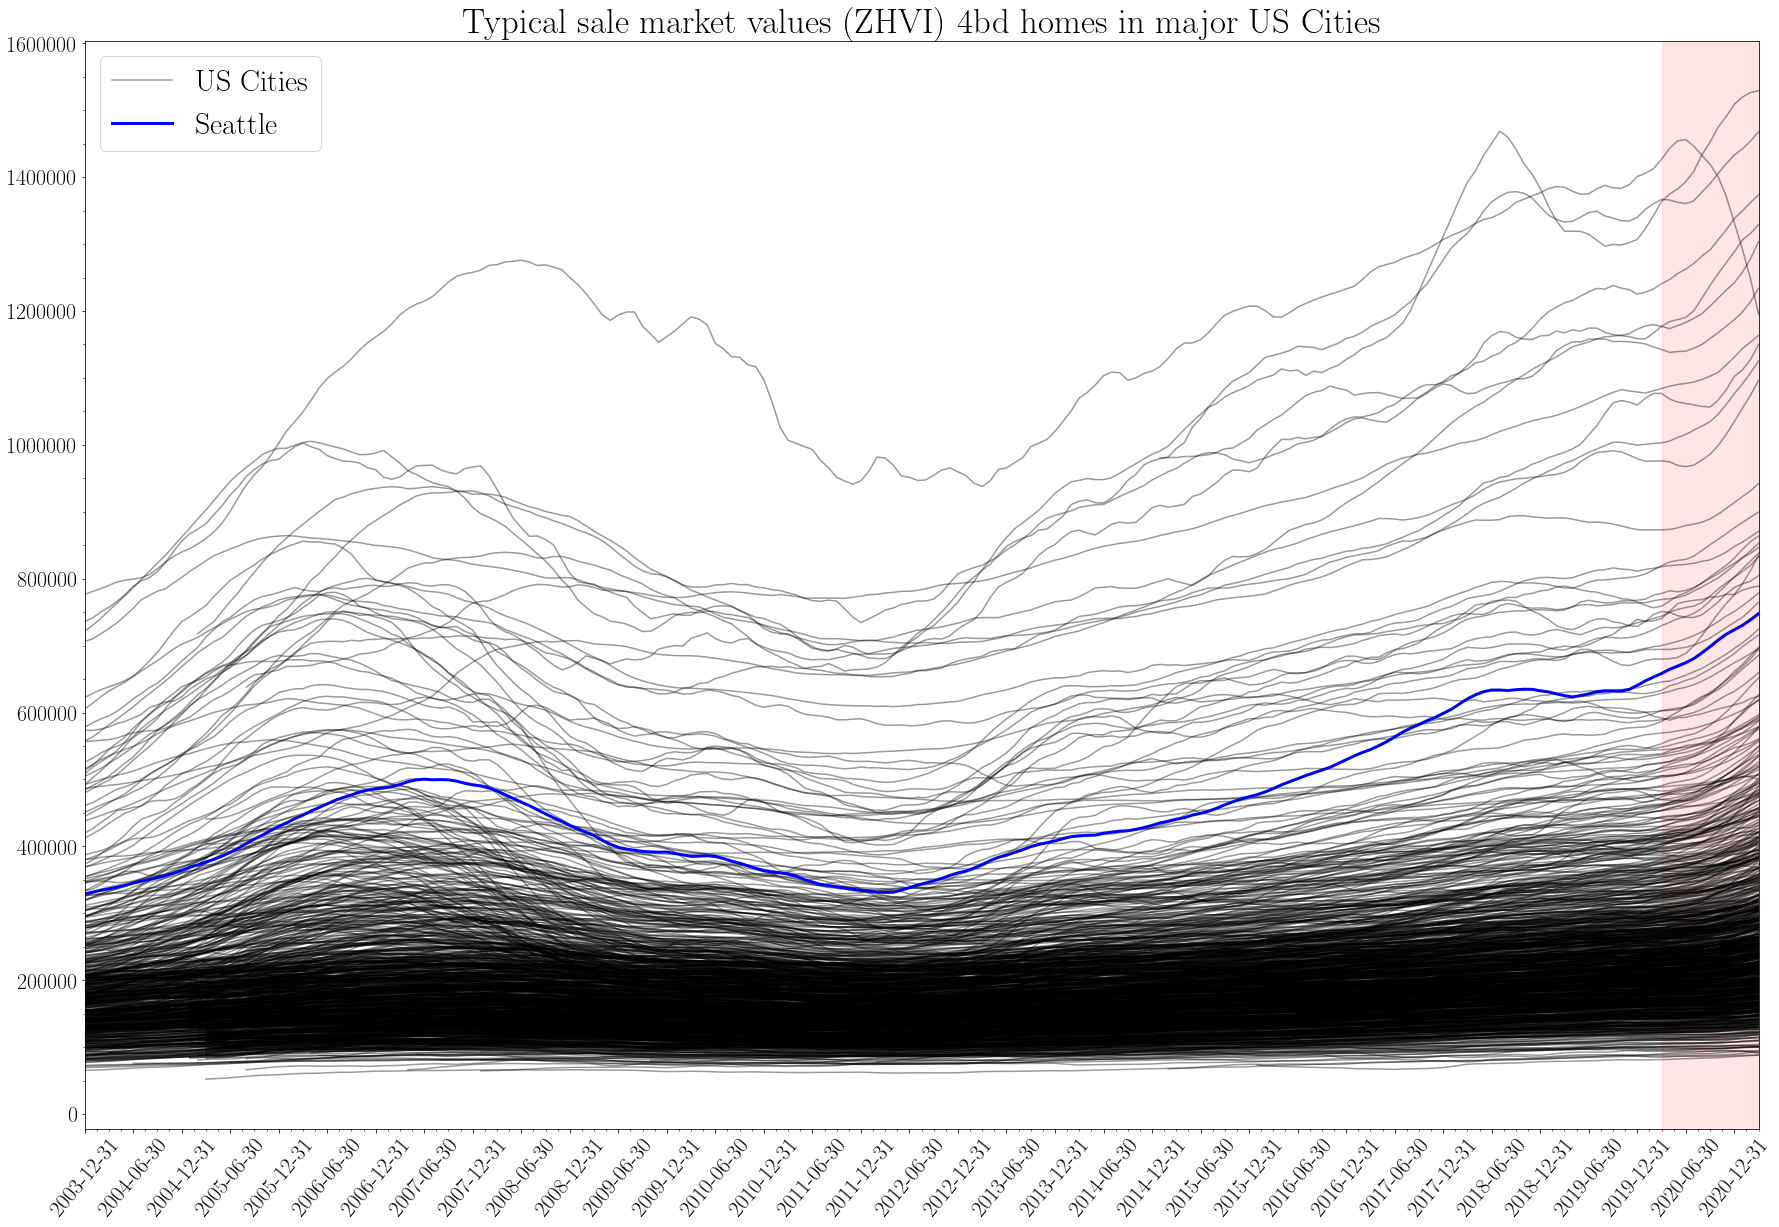

In [22]:
for i, df in enumerate([bd1, bd2, bd3, bd4]):
    start = 100
    dates = df.keys()[start:]
    dindex = np.arange(0,len(dates))

    plt.figure(figsize=[30,20])
    for reg in df['RegionName']:
        city = df[df['RegionName'] == reg].T[start:].values.flatten()
        plt.plot(dindex, city, color='k', alpha=.4)
    plt.plot(dindex[0], city[0], color='k', alpha=.4, label='US Cities')

    seattle = df[df['RegionName'] == 'Seattle, WA'].T[start:].values.flatten()
    plt.plot(dindex, seattle, color='b', linewidth=3, label='Seattle')
    plt.axvspan(dindex[-13], dindex[-1], color='r', alpha=.1)

    plt.xticks(dindex[::6], dates[::6], rotation=50)
    plt.xlim(0, dindex[-1])
    plt.title(f'Typical sale market values (ZHVI) {i+1}bd homes in major US Cities', fontsize=35)
    plt.legend(loc='upper left', fontsize=30)
    plt.minorticks_on()
    plt.show()

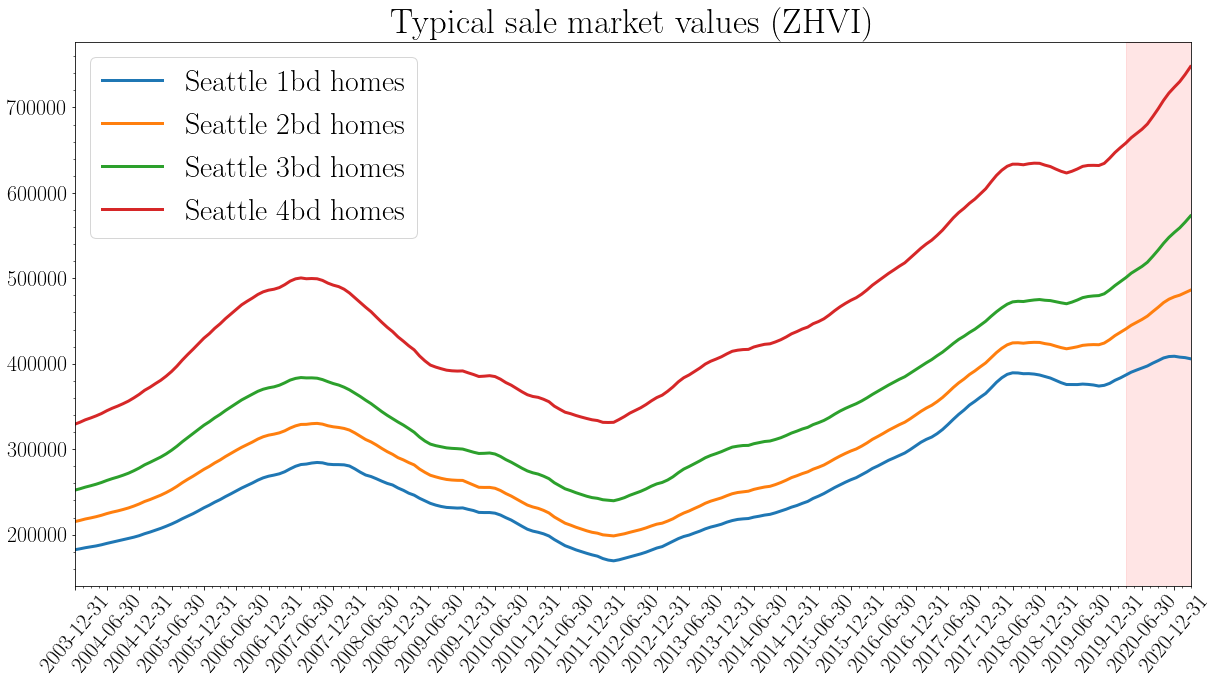

In [25]:
start = 100
dates = df.keys()[start:]
dindex = np.arange(0,len(dates))

plt.figure(figsize=[20,10])

for i, df in enumerate([bd1, bd2, bd3, bd4]):
    seattle = df[df['RegionName'] == 'Seattle, WA'].T[start:].values.flatten()
    plt.plot(dindex, seattle, linewidth=3, label=f"Seattle {i+1}bd homes")
plt.axvspan(dindex[-13], dindex[-1], color='r', alpha=.1)

plt.xticks(dindex[::6], dates[::6], rotation=50)
plt.xlim(0, dindex[-1])
plt.title(f'Typical sale market values (ZHVI)', fontsize=35)
plt.legend(loc='upper left', fontsize=30)
plt.minorticks_on()
plt.show()